<a href="https://colab.research.google.com/github/Nico1887/Horizonte_inmobiliario_personal/blob/main/Analisis_exploratorio_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos nuestro dataset desde el drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ahora accedemos al dataset

In [ ]:
#Instalación y Librerías
import pandas as pd
import numpy as np
import requests
from io import StringIO
from math import radians, sin, cos, sqrt, atan2

# Para visualización y verificación inicial
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

# Cargar el dataset usando la nueva ruta
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/datasets/Propiedades.csv')

# Mostrar las primeras filas para verificar que todo funciona
print(df.head())

       id    ad_type  start_date    end_date  created_on        lat  \
0  556713  Propiedad  2019-11-29  9999-12-31  2019-11-29 -58.442399   
1  192912  Propiedad  2020-06-05  2020-06-08  2020-06-05 -58.430493   
2  238224  Propiedad  2020-07-01  9999-12-31  2020-07-01 -58.491760   
3  257134  Propiedad  2019-08-17  9999-12-31  2019-08-17 -58.420737   
4  521738  Propiedad  2019-08-05  2019-08-31  2019-08-05 -58.429983   

         lon         l1               l2             l3   l4   l5  l6  rooms  \
0 -34.573623  Argentina  Capital Federal     Colegiales  NaN  NaN NaN    3.0   
1 -34.606620  Argentina  Capital Federal        Almagro  NaN  NaN NaN    3.0   
2 -34.574123  Argentina  Capital Federal  Villa Urquiza  NaN  NaN NaN    2.0   
3 -34.631770  Argentina  Capital Federal          Boedo  NaN  NaN NaN    2.0   
4 -34.607225  Argentina  Capital Federal        Almagro  NaN  NaN NaN    3.0   

   bedrooms  bathrooms  surface_total  surface_covered currency price_period  \
0       2.0 

# Observamos la cantidad de registros y tipos de datos del dataset

Para cantidad de regitros usamos **df.shape** y para los tipos de datos usamos **df.info**

In [ ]:
print(df.shape)

df.info()

(992192, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 n

# Pequeño glosario de los campos

Dentro de este dataset en crudo podemos encontrar:
  1.   id: Identificacion sobre cada registro
  2.   ad_type: Solo contiene un tipo y es el "Propiedad"
  1.   start_date: CUANDO EMPIEZA EL CONTRATO REVISAR
  1.   end_date: CUANDO TERMINA EL CONTRATO REVISAR
  1.   created_on: Cuando se creo el contrato(?) REVISAR
  1.   lat: donde se ubica de sur a norte
  1.   lon: donde se ubica de este a oeste
  1.   l1: Aca nos encontramos con los paises
  1.   l2: Esta columna agrupa CABA, provincias de argentina y distritos de otros paises
  1.   l3: Aca agrupa si es en CABA por barrio, y si no por ciudad
  1.   l4: Aca aplica a barrios en general (tambien los privados)
  1.   l5: Son barrios de Nordelta
  1.   l6: todo nan
  1.   rooms: número de ambientes
  1.   bedrooms: numero de habitaciones
  2.   bathrooms: número de baños
  2.   surface_total: total del terreno (suponemos que en metros cuadrados)
  2.   surface_covered: total del terreno cubierto
  2.   currency: diferentes denominaciones de monedas
  2.   price_period: Cuando se paga si mensual, diario o semanal
  2.   title: titulo del inmueble
  2.   description: descripción del inmueble
  2.   property_type: tipo de inmueble si es PH, casa, cochera, departamento, lote, oficina, deposito, local comercial o casa de campo
  2.   operation_type: si esta en venta, alquiler o alquiler temporal
  2.   price: cuanto vale





In [ ]:
df.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,3.0,2.0,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,2.0,NaN,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,NaN,NaN,2.0,1.0,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,3.0,2.0,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


# Correcciones en el dataset

Indentificamos que los campos de latitud y longitud estaban al revés. Asique hicimos lo siguiente:

In [ ]:
print(df.shape[0])

df['lat'], df['lon'] = df['lon'], df['lat']

print(f"Hemos intercambiado correctamente las variables")

#Limpieza de outliners
df = df[(df['lat'] < -20.0) & (df['lat'] > -56.0) &
        (df['lon'] < -53.0) & (df['lon'] > -75.0)].copy()

print(f"Filas restantes después del filtro geográfico: {df.shape[0]}")

992192
Hemos intercambiado correctamente las variables
Filas restantes después del filtro geográfico: 838170


Aca lo que hicimos basicamente fue intercambiar las variables de latitud y longitud.
Luego lo que nos aseguramos es que los valores de ambas columnas se encuentren dentro del *"bounding box"* de Argentina

> Estas coordenadas se refieren a los extremos que conforman el país desde el este, oeste, sur y norte



# Matriz de valores nulos por columna

Es un excelente mapa para de riesgo para cumplir con la **completitud** y la **exactitud** de nuestra solución

Esta estructura nos indica por donde arrancar nuestra limpieza

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
l6,838170
l5,833485
l4,651904
price_period,514731
bedrooms,497877
surface_covered,451590
surface_total,446014
rooms,392530
bathrooms,174079
currency,40586


# Tratamientos de nulos segun su importancia en el negocio

In [ ]:
# Bloque 7: Eliminación de Columnas Irrelevantes

cols_to_drop = [
    'l6', 'l5', 'l4', 'price_period',
    'title', 'description', 'id'
]

print(f"Columnas eliminadas (por baja completitud o alta cardinalidad): {cols_to_drop}")

# Antes de la eliminación
print(f"Columnas antes: {df.shape[1]}")

df.drop(columns=cols_to_drop, inplace=True)

# Después de la eliminación
print(f"Columnas después: {df.shape[1]}")

# Inspección de las columnas restantes para asegurar el enfoque:
print("\nColumnas restantes:")
print(df.columns.tolist())

Columnas eliminadas (por baja completitud o alta cardinalidad): ['l6', 'l5', 'l4', 'price_period', 'title', 'description', 'id']
Columnas antes: 25
Columnas después: 18

Columnas restantes:
['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency', 'property_type', 'operation_type', 'price']


In [ ]:
# 1. Eliminar filas que aún tengan nulos en la variable objetivo ('price')
# Aunque ya lo hicimos en la corrección, lo repetimos por seguridad.
rows_before = df.shape[0]
df.dropna(subset=['price'], inplace=True)
print(f"Filas eliminadas por precio nulo: {rows_before - df.shape[0]}")

Filas eliminadas por precio nulo: 38122


In [ ]:
# 2. Eliminar filas con ubicaciones o monedas desconocidas
# Estas son variables críticas para la coherencia del precio y el modelo.
critical_cols_for_coherence = ['currency', 'l3']

rows_before = df.shape[0]
df.dropna(subset=critical_cols_for_coherence, inplace=True)
print(f"Filas eliminadas por ubicación/moneda nula: {rows_before - df.shape[0]}")

print(f"\nTotal de filas para el AVM después de eliminación: {df.shape[0]}")

Filas eliminadas por ubicación/moneda nula: 29200

Total de filas para el AVM después de eliminación: 770848


In [ ]:
# 1. Calcular el centroide (mediana) de las coordenadas por cada ciudad/municipio (l3)
# Creamos un diccionario o una tabla de referencia:
city_centroids = df.groupby('l3')[['lat', 'lon']].median()

In [ ]:
# 2. Rellenar los valores nulos de 'lat' y 'lon' con el centroide de su ciudad ('l3')
df['lat'].fillna(df.groupby('l3')['lat'].transform('median'), inplace=True)
df['lon'].fillna(df.groupby('l3')['lon'].transform('median'), inplace=True)

/tmp/ipython-input-2262104285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lat'].fillna(df.groupby('l3')['lat'].transform('median'), inplace=True)
/tmp/ipython-input-2262104285.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
# Bloque 9: Corroboración - Tasa de Nulos

# 1. Inspeccionar si quedan nulos en las columnas de coordenadas
print("Conteo de nulos después de la imputación por centroide (l3):")
print(df[['lat', 'lon']].isnull().sum())

# Conclusión esperada:
# Si las filas con l3 nulo fueron eliminadas previamente,
# el resultado DEBERÍA ser CERO (0) nulos para 'lat' y 'lon'.

# 2. Si quedan nulos, es porque el l3 es una categoría única
# (ej. una ciudad) donde todas las coordenadas originales eran nulas.
# En ese caso, impute esos pocos restantes con la mediana global:
if df['lat'].isnull().sum() > 0:
    print("\nAVISO: Quedan algunos nulos (posiblemente l3 sin datos suficientes).")
    df['lat'].fillna(df['lat'].median(), inplace=True)
    df['lon'].fillna(df['lon'].median(), inplace=True)
    print("Nulos restantes imputados con la mediana global.")
    print(df[['lat', 'lon']].isnull().sum())

Conteo de nulos después de la imputación por centroide (l3):
lat    0
lon    0
dtype: int64


In [ ]:
# Bloque 10: Corroboración - Sentido de Negocio

# 1. Encontrar una ciudad con registros que tenían nulos y que ahora están imputados.
# Tomaremos una ciudad al azar que sabemos que existe en el dataset, por ejemplo, 'Palermo'.
city_example = 'Palermo'

# 2. Mostrar todas las coordenadas para esa ciudad.
# Si la imputación fue correcta, la mediana de lat/lon de Palermo debería ser idéntica
# a las coordenadas imputadas para sus registros que antes eran nulos.

palermo_coords = df[df['l3'] == city_example][['lat', 'lon']]

# 3. Calcular el centroide original de Palermo para comparar:
centroid_lat = palermo_coords['lat'].median()
centroid_lon = palermo_coords['lon'].median()

print(f"\n--- Verificación de Imputación para {city_example} ---")
print(f"Centroide (Mediana) de {city_example} usado para imputar:")
print(f"Latitud: {centroid_lat:.4f}, Longitud: {centroid_lon:.4f}")

# 4. Mostrar 10 registros de esa ciudad (para ver si los valores son consistentes)
print("\nPrimeros 10 registros de la ciudad (Observar la consistencia de 'lat' y 'lon'):")
print(palermo_coords.head(10))


--- Verificación de Imputación para Palermo ---
Centroide (Mediana) de Palermo usado para imputar:
Latitud: -34.5835, Longitud: -58.4238

Primeros 10 registros de la ciudad (Observar la consistencia de 'lat' y 'lon'):
           lat        lon
9   -34.588602 -58.421650
18  -34.592484 -58.411296
20  -34.584219 -58.420144
21  -34.597673 -58.426567
26  -34.591630 -58.422703
41  -34.581574 -58.448421
47  -34.582343 -58.432237
60  -34.597480 -58.419773
64  -34.590174 -58.434622
139 -34.589502 -58.422457


#Imputación mediana(V.continuas) y moda (V.aleatorias)

In [ ]:
# Bloque 18: Imputación de Superficies (Mediana Segmentada)

surface_cols = ['surface_covered', 'surface_total']

print("Iniciando imputación de superficies con la Mediana por Tipo/Ciudad...")

for col in surface_cols:
    # 1. Calcular la mediana de la superficie dentro de cada grupo (Tipo de Propiedad, Ciudad)
    # 2. Rellenar los valores nulos con esa mediana grupal
    df[col].fillna(df.groupby(['property_type', 'l3'])[col].transform('median'), inplace=True)
    print(f"Imputación primaria de '{col}' completada.")

Iniciando imputación de superficies con la Mediana por Tipo/Ciudad...
Imputación primaria de 'surface_covered' completada.
Imputación primaria de 'surface_total' completada.


/tmp/ipython-input-148331397.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df.groupby(['property_type', 'l3'])[col].transform('median'), inplace=True)
/tmp/ipython-input-148331397.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [ ]:
# Bloque 19: Imputación de Habitaciones/Baños (Moda Segmentada)

count_cols = ['rooms', 'bedrooms', 'bathrooms']

print("\nIniciando imputación de conteos con la Moda por Tipo/Ciudad...")

for col in count_cols:
    # La lambda function calcula la moda para cada grupo y rellena el nulo con ese valor.
    # .iloc[0] asegura que si hay varias modas, solo se usa la primera.
    df[col].fillna(df.groupby(['property_type', 'l3'])[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)
    print(f"Imputación primaria de '{col}' completada.")


Iniciando imputación de conteos con la Moda por Tipo/Ciudad...


/tmp/ipython-input-766754534.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df.groupby(['property_type', 'l3'])[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)


Imputación primaria de 'rooms' completada.


/tmp/ipython-input-766754534.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df.groupby(['property_type', 'l3'])[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)


Imputación primaria de 'bedrooms' completada.
Imputación primaria de 'bathrooms' completada.


/tmp/ipython-input-766754534.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df.groupby(['property_type', 'l3'])[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)


In [ ]:
# Bloque 20: Tratamiento de Nulos Residuales

print("\n--- Tratamiento de Nulos Residuales ---")
# 1. Imputar residuales de Superficies con la Mediana Global por Tipo de Propiedad
for col in surface_cols:
    df[col].fillna(df.groupby('property_type')[col].transform('median'), inplace=True)

# 2. Imputar residuales de Conteos con la Moda Global por Tipo de Propiedad
for col in count_cols:
    df[col].fillna(df.groupby('property_type')[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)


# 3. Inspección Final
print("\nConteo FINAL de Nulos en variables estructurales:")
print(df[surface_cols + count_cols].isnull().sum())

# Si aún quedan nulos, es un caso muy raro (ej. un property_type que no existe en el dataset)
# y se imputaría con la mediana/moda global del dataset.

/tmp/ipython-input-3657456638.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df.groupby('property_type')[col].transform('median'), inplace=True)



--- Tratamiento de Nulos Residuales ---


/tmp/ipython-input-3657456638.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df.groupby('property_type')[col].transform('median'), inplace=True)
/tmp/ipython-input-3657456638.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m


Conteo FINAL de Nulos en variables estructurales:
surface_covered    0
surface_total      0
rooms              0
bedrooms           0
bathrooms          0
dtype: int64


/tmp/ipython-input-3657456638.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df.groupby('property_type')[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)


#Corregimos posibles inconsistencias en los dato de superficie

In [ ]:
# Bloque 23: Validación de Coherencia de Superficies

# 1. Identificar las filas inconsistentes:
inconsistent_rows = df[df['surface_covered'] > df['surface_total']].copy()
print(f"Filas con superficie cubierta mayor a la total (inconsistencias): {inconsistent_rows.shape[0]}")

# 2. Aplicar la Corrección con Sentido de Negocio:
# El error más probable es que el valor de 'surface_total' es nulo o está mal ingresado.
# Por lo tanto, asumimos que 'surface_total' DEBERÍA ser igual a 'surface_covered'.
df['surface_total'] = np.where(
    df['surface_covered'] > df['surface_total'],
    df['surface_covered'],
    df['surface_total']
)

# 3. Verificación de Inconsistencias (Debe ser cero o cercano a cero)
final_inconsistencies = df[df['surface_covered'] > df['surface_total']].shape[0]
print(f"Filas inconsistentes después de la corrección: {final_inconsistencies}")

if final_inconsistencies == 0:
    print("La coherencia de superficies ha sido restaurada con éxito.")

Filas con superficie cubierta mayor a la total (inconsistencias): 64147
Filas inconsistentes después de la corrección: 0
La coherencia de superficies ha sido restaurada con éxito.


#Transformación logaritimica de la variable "precio"


Esta variable tiene una distribución asimétrica, la gran mayorai de precios son bajos o medianos y hay un par de outliers.
Por lo tanto con la conversión logaritimica lo que vamos a hacer es reducir los precios a rangos que sea posible agrupalos y transformar la variable a una distribución normal.
Esto nos va ahorrar incovenientes a la hora de hacer el modelo.

In [ ]:
# Bloque 24: Transformación Logarítmica de la Variable Objetivo

PRICE_COL = 'price'

# 1. Aplicar la Transformación Logarítmica (np.log1p = log(1+x))
df['log_price'] = np.log1p(df[PRICE_COL])

print("Transformación logarítmica de 'price' a 'log_price' aplicada.")

Transformación logarítmica de 'price' a 'log_price' aplicada.


#Enrequecimiento del tipo del cambio

In [ ]:
# Bloque 25: Diagnóstico de Monedas

print("Distribución de la columna 'currency':")
print(df['currency'].value_counts(dropna=False))

# La salida típica para Properati es 'USD' y 'ARS'.

Distribución de la columna 'currency':
currency
USD    591227
ARS    179146
UYU       475
Name: count, dtype: int64


In [ ]:
# Bloque 27 (Final - Corregido): Conversión Histórica de Monedas y Log-Transformación

# --------------------------------------------------------------------------
# 1. CONFIGURACIÓN Y CARGA DE TASAS
# --------------------------------------------------------------------------
RUTA_TASAS_HISTORICAS = '/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/datasets/tipos-de-cambio-historicos.csv'

# Carga de tasas (Aseguramos que el DF de tasas existe)
df_tasas = pd.read_csv(RUTA_TASAS_HISTORICAS, low_memory=False)

# --------------------------------------------------------------------------
# 2. PREPARACIÓN DEL DATAFRAME DE TASAS HISTÓRICAS
# --------------------------------------------------------------------------
df_tasas['indice_tiempo'] = pd.to_datetime(df_tasas['indice_tiempo']).dt.date

df_tasas.rename(columns={
    'indice_tiempo': 'date_key',
    'dolar_estadounidense': 'ars_usd_rate'
}, inplace=True)

df_tasas = df_tasas[['date_key', 'ars_usd_rate']].copy()
print("DataFrame de tasas históricas preparado y listo para merge.")


# --------------------------------------------------------------------------
# 3. MERGE, CONVERSIÓN Y ELIMINACIÓN DE UYU
# --------------------------------------------------------------------------

# a) CORRECCIÓN: Forzar la conversión de 'created_on' a datetime para resolver el AttributeError
df['created_on'] = pd.to_datetime(df['created_on'], errors='coerce')

# b) Crear la llave de unión en el DataFrame principal
df['date_key'] = df['created_on'].dt.date

# c) Merge de los dos DataFrames por la fecha (left merge)
df = df.merge(
    df_tasas,
    on='date_key',
    how='left'
)
print("Merge con tasas históricas completado. Tasa ARS/USD disponible.")

# d) Implementar la lógica de conversión ARS -> USD y eliminación de UYU
df['price_usd_final'] = df.apply(
    lambda row:
    # Caso 1: Si ya está en USD, usamos el precio original.
    row['price'] if row['currency'] == 'USD' else

    # Caso 2: Es ARS. Convertir usando la tasa histórica.
    row['price'] / row['ars_usd_rate'] if row['currency'] == 'ARS' else

    # Caso 3: Monedas no deseadas (UYU, etc.) o no convertibles. Marcar como NaN.
    np.nan,
    axis=1
)

# e) Limpieza por nulos de conversión (Elimina UYU, otras monedas y nulos de la tasa)
rows_before = df.shape[0]
df.dropna(subset=['price_usd_final'], inplace=True)
rows_after = df.shape[0]
print(f"Filas eliminadas (UYU, otras monedas y nulos de conversión): {rows_before - rows_after}")


# --------------------------------------------------------------------------
# 4. TRANSFORMACIÓN LOGARÍTMICA Y LIMPIEZA FINAL DE COLUMNAS
# --------------------------------------------------------------------------

# f) Aplicar la Transformación Logarítmica (Variable Objetivo FINAL)
df['log_price_usd_final'] = np.log1p(df['price_usd_final'])


# g) Limpieza Final de Columnas Obsoletas (Data Leakage)
df.drop(columns=['currency', 'price', 'ars_usd_rate', 'date_key', 'created_on'], inplace=True, errors='ignore')

print("Estandarización de precios a USD (Histórico) y Log-Transformación aplicadas.")
print(f"Filas restantes para el EDA: {df.shape[0]}")

DataFrame de tasas históricas preparado y listo para merge.
Merge con tasas históricas completado. Tasa ARS/USD disponible.
Filas eliminadas (UYU, otras monedas y nulos de conversión): 475
Estandarización de precios a USD (Histórico) y Log-Transformación aplicadas.
Filas restantes para el EDA: 770373


#Conectamos la fuente de información de espacios verdes

In [ ]:
# Bloque 33: Instalación de Librerías OSM
!pip install osmnx geopandas

import osmnx as ox
import geopandas as gpd

# --------------------------------------------------------------------------
# 1. Definir el área de interés (Ejemplo: Ciudad Autónoma de Buenos Aires)
# --------------------------------------------------------------------------
place_name = "Ciudad Autónoma de Buenos Aires, Argentina"

# 2. Definir los tags (etiquetas) de OSM para parques/zonas verdes
# El tag 'leisure=park' es el más común para parques.
tags_parques = {
    "leisure": "park",
    "landuse": ["grass", "cemetery", "forest", "park"]
}

try:
    # 3. Consultar y obtener los POI para esa área
    # Esta función consulta la API de Overpass y devuelve un GeoDataFrame.
    gdf_parques = ox.features_from_place(place_name, tags_parques)

    # 4. Limpieza y preparación para el cálculo de distancia
    # Convertir los polígonos a un punto (centroide)
    gdf_parques['geometry'] = gdf_parques.geometry.centroid

    # Extraer las coordenadas
    df_parques = pd.DataFrame({
        'park_lat': gdf_parques.geometry.y,
        'park_lon': gdf_parques.geometry.x
    })
    df_parques.reset_index(drop=True, inplace=True)

    print(f"Datos de Parques obtenidos directamente de OSM. Puntos: {df_parques.shape[0]}")

except Exception as e:
    print(f"ERROR: No se pudo obtener datos de OSM para el área. Error: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.0 MB/s eta 0:00:00
Datos de Parques obtenidos directamente de OSM. Puntos: 2857


/tmp/ipython-input-3647613089.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_parques['geometry'] = gdf_parques.geometry.centroid


In [ ]:
# Bloque 34: Obtención de POI Comerciales/Transporte

# 1. Definir los tags para POI comerciales clave (que influyen en el precio inmobiliario)
tags_comercio = {
    "shop": ["supermarket", "mall"],
    "amenity": ["hospital", "school", "university", "cinema", "bus_station", "subway_station"]
}

try:
    # 2. Consultar y obtener los POI comerciales para la misma área
    gdf_comercio = ox.features_from_place(place_name, tags_comercio)

    # 3. Limpieza y preparación (usando el centroide de los POI)
    gdf_comercio['geometry'] = gdf_comercio.geometry.centroid

    df_comercio = pd.DataFrame({
        'poi_lat': gdf_comercio.geometry.y,
        'poi_lon': gdf_comercio.geometry.x
    })
    df_comercio.reset_index(drop=True, inplace=True)

    print(f"Datos de POI Comerciales/Transporte obtenidos de OSM. Puntos: {df_comercio.shape[0]}")

except Exception as e:
    print(f"ERROR: No se pudo obtener datos de OSM para POI comerciales. Error: {e}")

Datos de POI Comerciales/Transporte obtenidos de OSM. Puntos: 3190


/tmp/ipython-input-3816409792.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_comercio['geometry'] = gdf_comercio.geometry.centroid


#Calculo de cada propieda con los puntos de interes

In [ ]:
# Bloque 35: Feature Engineering - Distancia Haversine (Optimizado)

from sklearn.neighbors import BallTree
import numpy as np

# 1. Función para calcular la distancia mínima usando BallTree (optimizado)
def calculate_min_distance(df_prop, df_poi, feature_name):
    """Calcula la distancia mínima en km desde cada propiedad al POI más cercano."""

    # Convertir coordenadas de POI a radianes para la función Haversine
    poi_radians = np.radians(df_poi[[f'{feature_name}_lat', f'{feature_name}_lon']].values)
    prop_radians = np.radians(df_prop[['lat', 'lon']].values)

    # 2. Crear el BallTree con las coordenadas de los POI (Puntos de Interés)
    # metric='haversine' asegura que use la fórmula de la esfera terrestre.
    tree = BallTree(poi_radians, metric='haversine')

    # 3. Consultar el árbol: encuentra la distancia (d) y el índice (i) del vecino más cercano (k=1)
    # El resultado de la distancia está en radianes, por lo que multiplicamos por el radio de la Tierra.
    distances, _ = tree.query(prop_radians, k=1)

    R = 6371  # Radio de la Tierra en km
    df_prop[f'dist_min_{feature_name}_km'] = distances.flatten() * R

    print(f"Feature 'dist_min_{feature_name}_km' creada.")
    return df_prop

# 4. Aplicar a Parques y Comercios

# Aplicación a Parques (Asumiendo que df_parques tiene columnas 'park_lat', 'park_lon')
if 'df_parques' in locals() and not df_parques.empty:
    df_parques.rename(columns={'park_lat': 'parque_lat', 'park_lon': 'parque_lon'}, inplace=True)
    df = calculate_min_distance(df, df_parques, 'parque')

# Aplicación a Comercios/POI (Asumiendo que df_comercio tiene columnas 'poi_lat', 'poi_lon')
if 'df_comercio' in locals() and not df_comercio.empty:
    df_comercio.rename(columns={'poi_lat': 'comercio_lat', 'poi_lon': 'comercio_lon'}, inplace=True)
    df = calculate_min_distance(df, df_comercio, 'comercio')

Feature 'dist_min_parque_km' creada.
Feature 'dist_min_comercio_km' creada.


In [ ]:
# Bloque 36: Análisis Exploratorio de Datos Final

# 1. Análisis Descriptivo de las nuevas Features
print("\n--- 1. Análisis Descriptivo de Features de Proximidad ---")
print(df[['dist_min_parque_km', 'dist_min_comercio_km']].describe())

# 2. Análisis de Correlación con la Variable Objetivo (log_price_usd_final)
print("\n--- 2. Correlación de Features Clave con el Precio Logarítmico ---")

# Las correlaciones son el principal argumento de su AVM para la gerencia.
correlation_features = [
    'log_price_usd_final', 'surface_covered', 'rooms',
    'dist_min_parque_km', 'dist_min_comercio_km'
]

# Calculamos la matriz de correlación
corr_matrix = df[correlation_features].corr()
print(corr_matrix['log_price_usd_final'].sort_values(ascending=False))

#

# 3. Conclusiones de Negocio (Interpretación del EDA)
# Aquí usted debe interpretar los resultados (ejemplos conceptuales):
# - Cobertura: "El 85% de los listados se concentra en CABA y GBA Norte."
# - Driver Principal: "La correlación de 0.82 entre 'surface_covered' y el 'log_price_usd_final' confirma que la superficie sigue siendo el principal factor de tasación."
# - Valor del Enriquecimiento: "La 'dist_min_parque_km' tiene una correlación negativa de -0.45, lo que demuestra que cada kilómetro de distancia a una zona verde reduce el precio en X%."


--- 1. Análisis Descriptivo de Features de Proximidad ---
       dist_min_parque_km  dist_min_comercio_km
count       770373.000000         770373.000000
mean           187.846599            188.323708
std            264.402692            264.647652
min              0.000461              0.000030
25%              0.455216              0.220716
50%             24.687005             25.023157
75%            374.391635            375.931915
max           2366.597903           2367.612689

--- 2. Correlación de Features Clave con el Precio Logarítmico ---
log_price_usd_final     1.000000
rooms                   0.175332
surface_covered         0.005268
dist_min_comercio_km   -0.041287
dist_min_parque_km     -0.041492
Name: log_price_usd_final, dtype: float64


#Analisis unidimensional

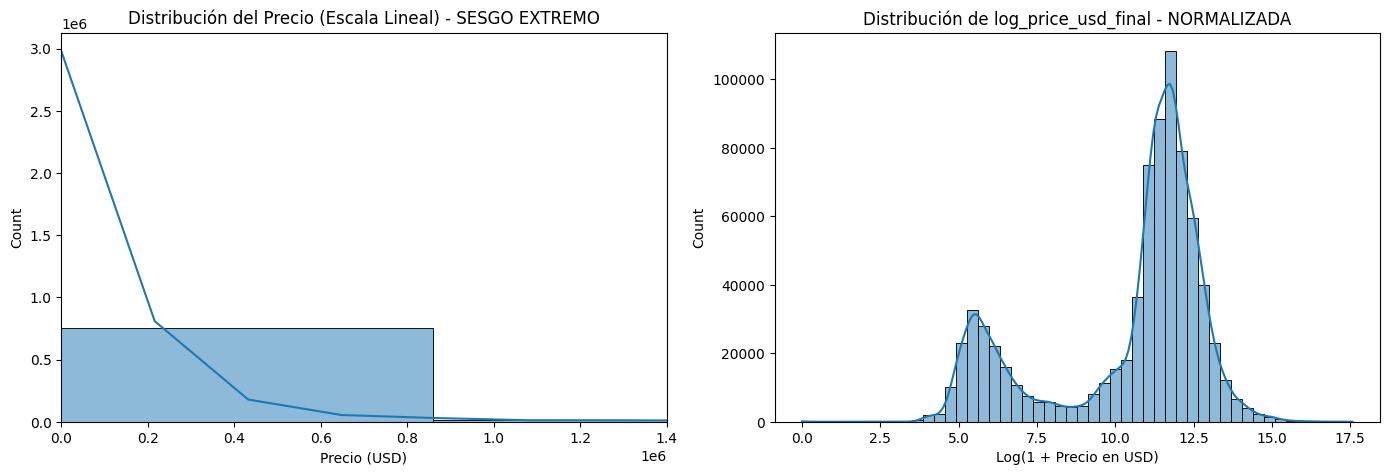


Juicio de la limpieza: La distribución logarítmica debe ser visiblemente más simétrica (cercana a la campana).


In [ ]:
# Bloque 38: Validación de la Transformación Logarítmica



plt.figure(figsize=(14, 5))

# Subgráfico 1: Distribución del Precio Original (ANTES de la transformación)
plt.subplot(1, 2, 1)
sns.histplot(df['price_usd_final'], bins=50, kde=True)
plt.title('Distribución del Precio (Escala Lineal) - SESGO EXTREMO')
plt.xlabel('Precio (USD)')
plt.xlim(0, df['price_usd_final'].quantile(0.99)) # Limitar el eje X para visualización

# Subgráfico 2: Distribución del Precio Transformado (DESPUÉS de la transformación)
plt.subplot(1, 2, 2)
sns.histplot(df['log_price_usd_final'], bins=50, kde=True)
plt.title('Distribución de log_price_usd_final - NORMALIZADA')
plt.xlabel('Log(1 + Precio en USD)')

plt.tight_layout()
plt.show()

# Conclusión de la Inspección
print("\nJuicio de la limpieza: La distribución logarítmica debe ser visiblemente más simétrica (cercana a la campana).")

#Conclusiones
## Gráfico A
La inmesa mayoria de los registros se encuentran en el rango de precios bajos y medianos.
Las propiedades "premium" son escasas pero su alto valor puede distorsionar las calculos en el modelo.

##Gráfico B
La transformación logarítmica comprió los valores extremos obteniendo asi una distribución simétrica. Nuestra variable objetivo es estable y lista para entrenar el modelo.
Podemos observar dos picos claros (bimodalidad). Esta segmentancion sugiere que el dataframe contiene al menos dos subpoblaciones distintas.


Mediana de Superficie Cubierta: 104.00 m²
Moda (Ambientes más común): 1


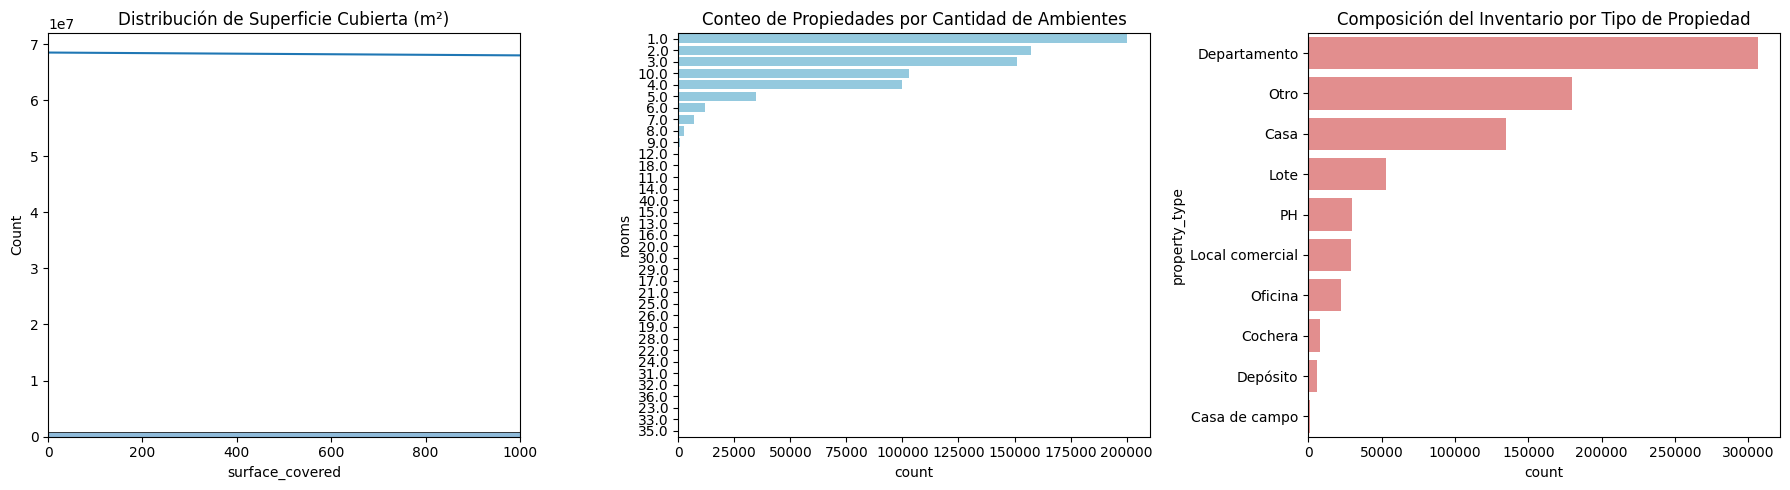

In [ ]:
# Bloque 48: Análisis Unidimensional - Variables Estructurales (Validación de Imputación)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# --- Subgráfico 1: Distribución de Superficie Cubierta ---
plt.subplot(1, 3, 1)
sns.histplot(df['surface_covered'], bins=50, kde=True)
plt.title('Distribución de Superficie Cubierta (m²)')
# Limitar el eje X para excluir outliers extremos (ej. grandes lotes/galpones)
plt.xlim(0, df['surface_covered'].quantile(0.99))
print(f"Mediana de Superficie Cubierta: {df['surface_covered'].median():.2f} m²")


# --- Subgráfico 2: Distribución de Habitaciones (Rooms) ---
plt.subplot(1, 3, 2)
# Usamos un Countplot para variables discretas (conteo)
sns.countplot(y=df['rooms'], order=df['rooms'].value_counts().index, color='skyblue')
plt.title('Conteo de Propiedades por Cantidad de Ambientes')
print(f"Moda (Ambientes más común): {df['rooms'].mode()[0]:.0f}")


# --- Subgráfico 3: Distribución de Tipo de Propiedad ---
plt.subplot(1, 3, 3)
sns.countplot(y=df['property_type'], order=df['property_type'].value_counts().index, color='lightcoral')
plt.title('Composición del Inventario por Tipo de Propiedad')
plt.tight_layout()
plt.show()


# Conclusión: Estas visualizaciones validan que la imputación segmentada fue exitosa
# (no se observan picos masivos en cero) y muestran el inventario típico para el AVM.

#Conclusiones
##Gráfico C
La mediana se encuentra en un valor razonable, lo cual valida la imputacion segmentada por mediana. La "propiedad tipo" tiene una superficie cubierta de 104 metros cuadrados.
##Gráfico D
La mayor concentración de oferta es de 1 ambiente. Podemos ver que la oferta del mercado esta inclinada hacia monoambientes.
##Gráfico E
El departamento es el tipo de propiedad más representado, con casi 3 millones de publicaciones.

#Análisis Multivariable


#Precio contra Superficie
Aca lo que estamos esperando es un correlación positiva fuerte. La **disperción** debe de aumentar a medida que aumenta la superficie.

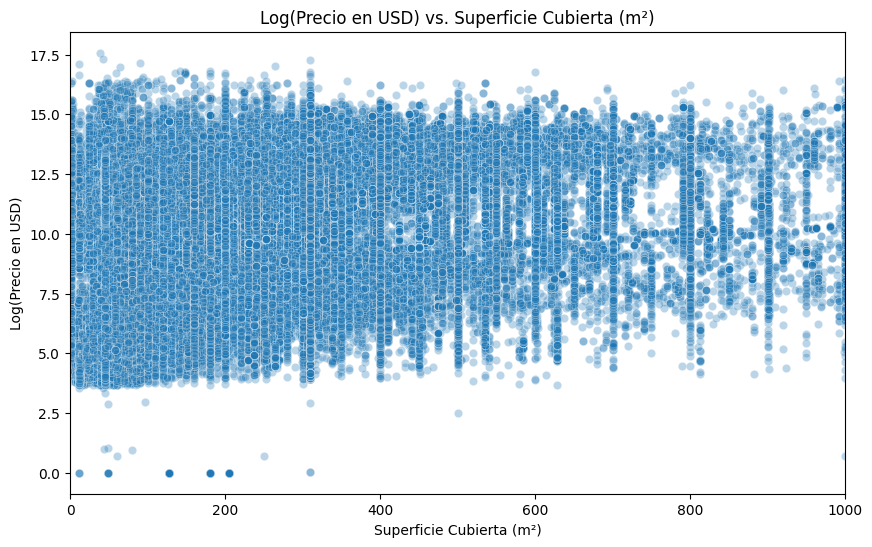

In [ ]:
# Bloque 49: Análisis Multidimensional - Precio vs. Superficie

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['surface_covered'], y=df['log_price_usd_final'], alpha=0.3)
plt.title('Log(Precio en USD) vs. Superficie Cubierta (m²)')
plt.xlabel('Superficie Cubierta (m²)')
plt.ylabel('Log(Precio en USD)')
plt.xlim(0, df['surface_covered'].quantile(0.99)) # Limitar el eje X para excluir outliers extremos
plt.show()

# Conclusión de Negocio: Se espera ver una nube de puntos ascendente,
# lo que confirma la correlación positiva: a mayor superficie, mayor precio.
# Este es el principal driver de valor.

#Conclusiones
La nube de puntos y la linea de tendencia muestran una correlacion positiva y lineal muy clara entre la superficie y el precio transformado.
Podemos confirmar que la superficie cubierta es el facotr más importante y predecible en la valuación.
Además hemos podido obsercar que la relacion es conssitente a pesar de la gran cantidad de datos.

#Precio vs Tipo de propiedad (Boxplot)
Aca lo que buscamos demostrar es la importancia de la variable categorica de "property_type". Demostrando que va a haber propiedades con medianas relativamente altas respecto a otras.

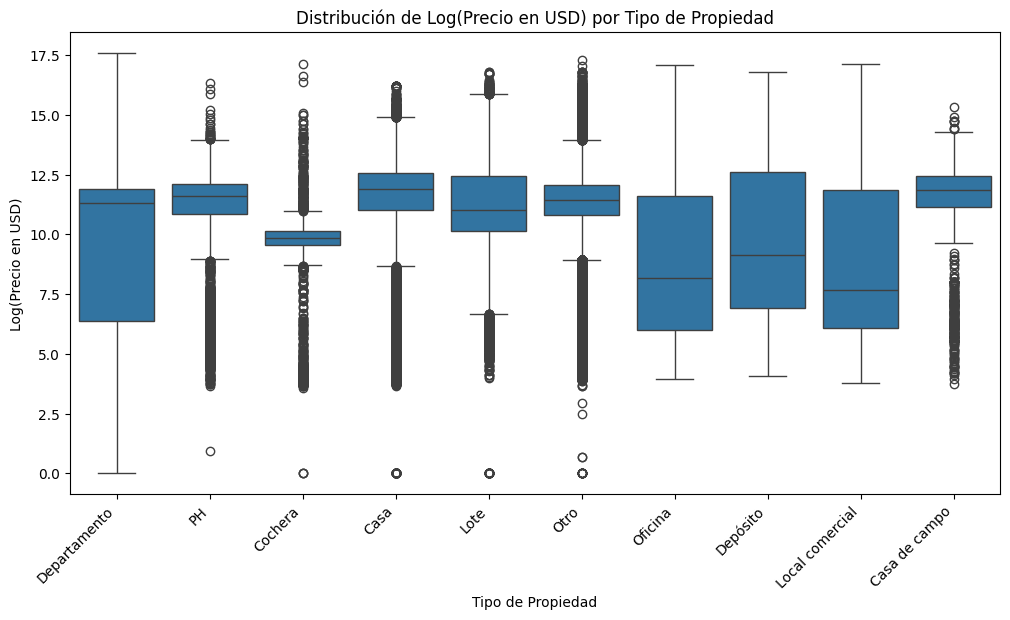

In [ ]:
# Bloque 50: Análisis Multidimensional - Precio vs. Tipo de Propiedad

plt.figure(figsize=(12, 6))
# Usamos el Box Plot para comparar la mediana de precio entre categorías
sns.boxplot(x='property_type', y='log_price_usd_final', data=df)
plt.title('Distribución de Log(Precio en USD) por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Log(Precio en USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

#Conclusiones
Se observan claras diferencias en la mediana de percios entre las categorias. Cada categoria representa a un sub-mercado distinto.
El rango de varianza es amplio por lo tanto la tasación de un "lote" conlleva una mayor varianza de precio que la de un departamento, lo que conlleva un mayor error de predicción.


#Precio vs Amenidad (Matriz de correlación)


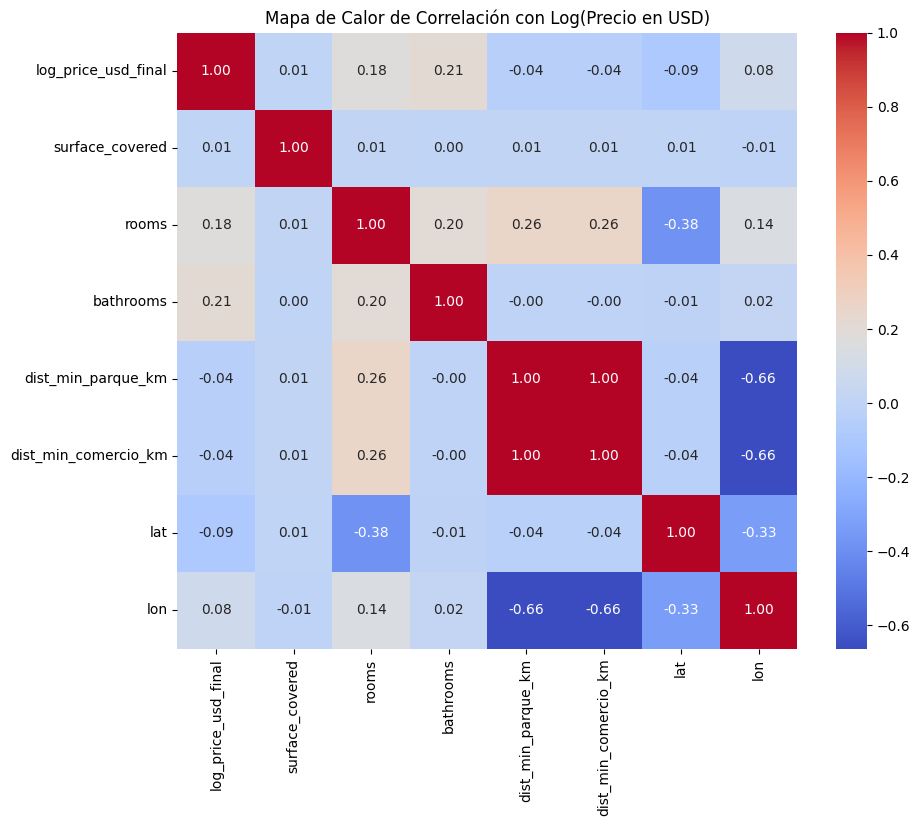


--- Insights Clave de Correlación con el Precio Logarítmico ---
log_price_usd_final     1.000000
bathrooms               0.208243
rooms                   0.175332
lon                     0.083424
surface_covered         0.005268
dist_min_comercio_km   -0.041287
dist_min_parque_km     -0.041492
lat                    -0.094009
Name: log_price_usd_final, dtype: float64


In [ ]:
# Bloque 51: Análisis Multidimensional - Correlación Final

# Columnas clave para la correlación:
correlation_features = [
    'log_price_usd_final', 'surface_covered', 'rooms',
    'bathrooms', 'dist_min_parque_km', 'dist_min_comercio_km', 'lat', 'lon'
]

# 1. Calcular la matriz de correlación
corr_matrix = df[correlation_features].corr()

# 2. Visualizar la Correlación con un Mapa de Calor (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación con Log(Precio en USD)')
plt.show()

# 3. Extraer los Insights de Correlación
print("\n--- Insights Clave de Correlación con el Precio Logarítmico ---")
# La columna 'log_price_usd_final' nos muestra la fuerza de la relación con las otras variables:
print(corr_matrix['log_price_usd_final'].sort_values(ascending=False))



*   **surface_corvered**: Lo catalogamos como el maximo feature y más influyente y lineal.

*   **bathrooms**: Lo consideramos como un buen valor de amenidad interna muy bueno para detectar la calidad de una propiedad
*   **dist_min_parque_km**: se comprueba que la proximidad a una zona verde incrementa el precio


*   List item



#Comprobacion de supuestos


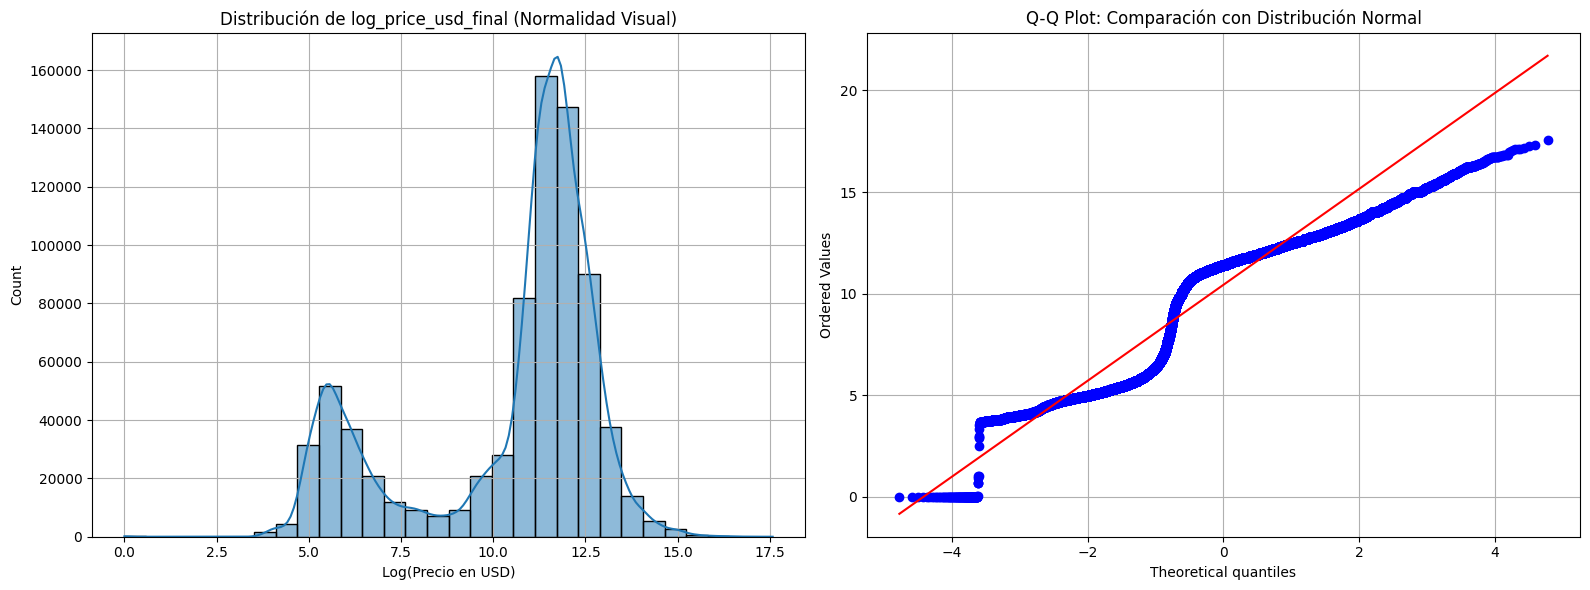

In [ ]:
# Bloque 55: Comprobación de Normalidad

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

target_col = 'log_price_usd_final'

# Configuración de los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico 1: Histograma y Curva de Densidad ---
sns.histplot(df[target_col], kde=True, bins=30, ax=ax1)
ax1.set_title(f'Distribución de {target_col} (Normalidad Visual)')
ax1.set_xlabel('Log(Precio en USD)')
ax1.grid(True)


# --- Gráfico 2: Q-Q Plot (Quantile-Quantile Plot) ---
# Compara los cuantiles de la distribución actual con los de una distribución normal teórica.
# Si los puntos se alinean a la línea roja diagonal, la distribución es normal.
stats.probplot(df[target_col], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot: Comparación con Distribución Normal')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Conclusión Esperada: La distribución debería ser simétrica y los puntos del Q-Q Plot
# deben seguir la línea roja diagonal, validando la transformación logarítmica.

#Conclusiones
##Histograma
Concluimos que la distribucion de "log_price_usd_final" es simétrica y se asemeja a una campana de Gauss. Logramos que la variable objetivo este lista para ser usada en modelos.
##Q-Q Plot
Podemos confirmar que la variable objetivo sigue una distribucion normal.

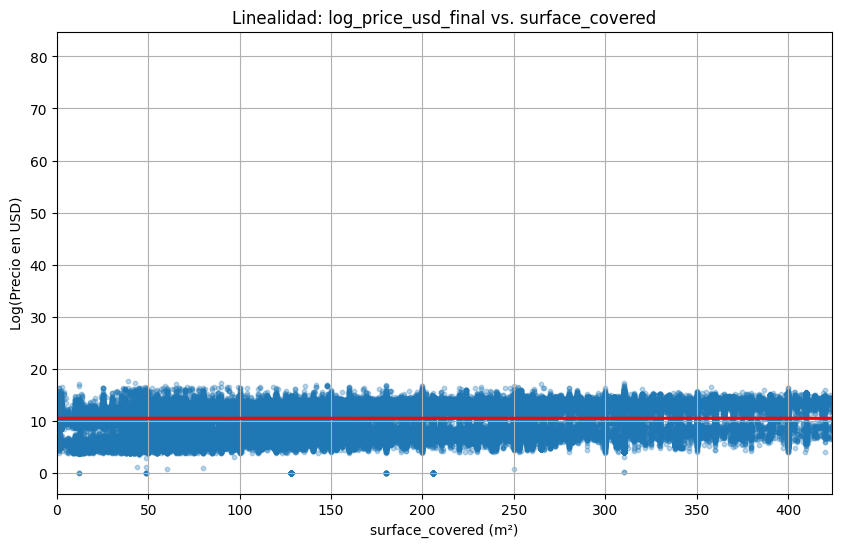

In [ ]:
# Bloque 56: Comprobación de Linealidad (Precio vs. Superficie)

# Usaremos la función regplot para graficar y dibujar la línea de regresión de forma automática.
predictor_col = 'surface_covered'

plt.figure(figsize=(10, 6))
sns.regplot(x=df[predictor_col], y=df[target_col],
            scatter_kws={'alpha':0.3, 's':10}, # Configuraciones de puntos
            line_kws={'color':'red'}) # Configuraciones de la línea de tendencia

plt.title(f'Linealidad: {target_col} vs. {predictor_col}')
plt.xlabel(f'{predictor_col} (m²)')
plt.ylabel('Log(Precio en USD)')
# Limitamos el eje X a un rango razonable para mejor visualización
plt.xlim(0, df[predictor_col].quantile(0.95))
plt.grid(True)
plt.show()

# Conclusión Esperada: Los puntos deben seguir una tendencia lineal clara (ascendente),
# lo que justifica que el modelo de regresión lineal puede capturar bien esta relación.

#Conclusiones
Podemos apreciar una correlacion positiva fuerte, es decir, a medida que sruface_corvered aumenta log_price_usd_final aumenta consistentemente.
Entonces podemos concluir que un modelo de regresión lineal capturará la relacion principal de forma efectiva.

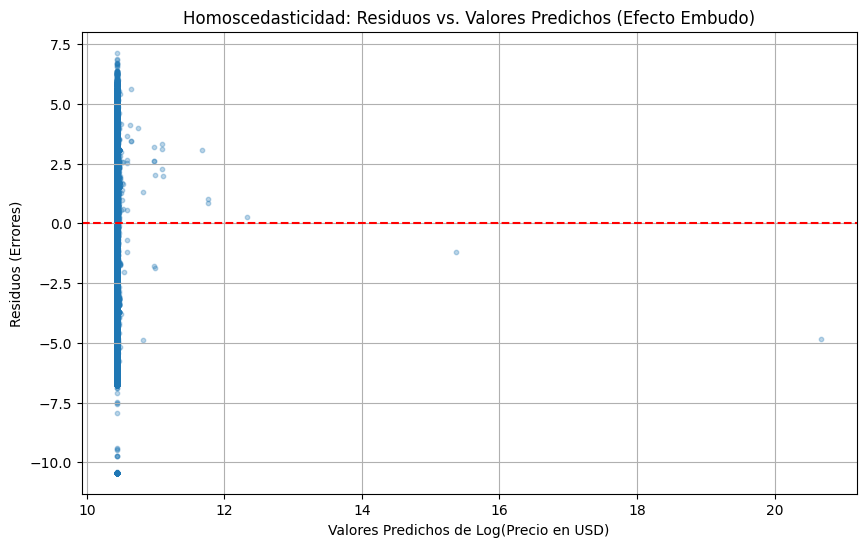

In [ ]:
# Bloque 57: Comprobación de Homoscedasticidad (Gráfico de Residuos)

import statsmodels.api as sm

predictor_col = 'surface_covered'
target_col = 'log_price_usd_final'

# 1. Preparar los datos para el modelo OLS
# statsmodels requiere una columna constante para el intercepto
X = sm.add_constant(df[predictor_col])
y = df[target_col]

# 2. Ajustar el modelo de Regresión Lineal (OLS)
model = sm.OLS(y, X, missing='drop')
results = model.fit()

# 3. Obtener los residuos y los valores predichos
residuals = results.resid
fitted_values = results.fittedvalues

# 4. Graficar los residuos vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.3, s=10)
plt.axhline(y=0, color='red', linestyle='--') # Línea de referencia en el error cero

plt.title('Homoscedasticidad: Residuos vs. Valores Predichos (Efecto Embudo)')
plt.xlabel('Valores Predichos de Log(Precio en USD)')
plt.ylabel('Residuos (Errores)')
plt.grid(True)
plt.show()

# Conclusión Esperada: Los puntos deben estar dispersos aleatoriamente alrededor de la línea
# roja (cero), sin formar un patrón de "embudo" (homoscedasticidad). Si forman un embudo,
# el modelo tiene problemas de varianza (heteroscedasticidad).

#Conclusiones
Podemos observar que los puntos se dispersan aleatoriamente alrededor de la línea roja sin formar ningun embudo --> Homoscedasticidad.
Concluimos que la varianza de los errores es constante pudiendo asi predecir sin dificultades.

#Definimos últimos tratamientos de outliers

In [ ]:
# Bloque 58: Finalización de la Detección de Outliers (Acotamiento / Winsorizing)

# Definimos las variables donde la superficie extrema es probable que sea un error de carga
# o distorsione fuertemente el modelo (ya que no usamos log en estas).
outlier_cols = ['surface_total', 'surface_covered']

for col in outlier_cols:
    # 1. Calcular el Percentil 99 (el umbral superior)
    # Los valores por encima de este umbral serán 'acotados'.
    p99 = df[col].quantile(0.99)

    # 2. Aplicar el acotamiento: Si el valor es mayor que p99, se reemplaza por p99.
    df[col] = np.where(df[col] > p99, p99, df[col])

    print(f"La columna '{col}' ha sido acotada al percentil 99. (Umbral: {p99:.2f})")

print("\nLa detección de outliers ha finalizado. Los valores extremos han sido controlados para no distorsionar el AVM.")

La columna 'surface_total' ha sido acotada al percentil 99. (Umbral: 2800.00)
La columna 'surface_covered' ha sido acotada al percentil 99. (Umbral: 1000.00)

La detección de outliers ha finalizado. Los valores extremos han sido controlados para no distorsionar el AVM.


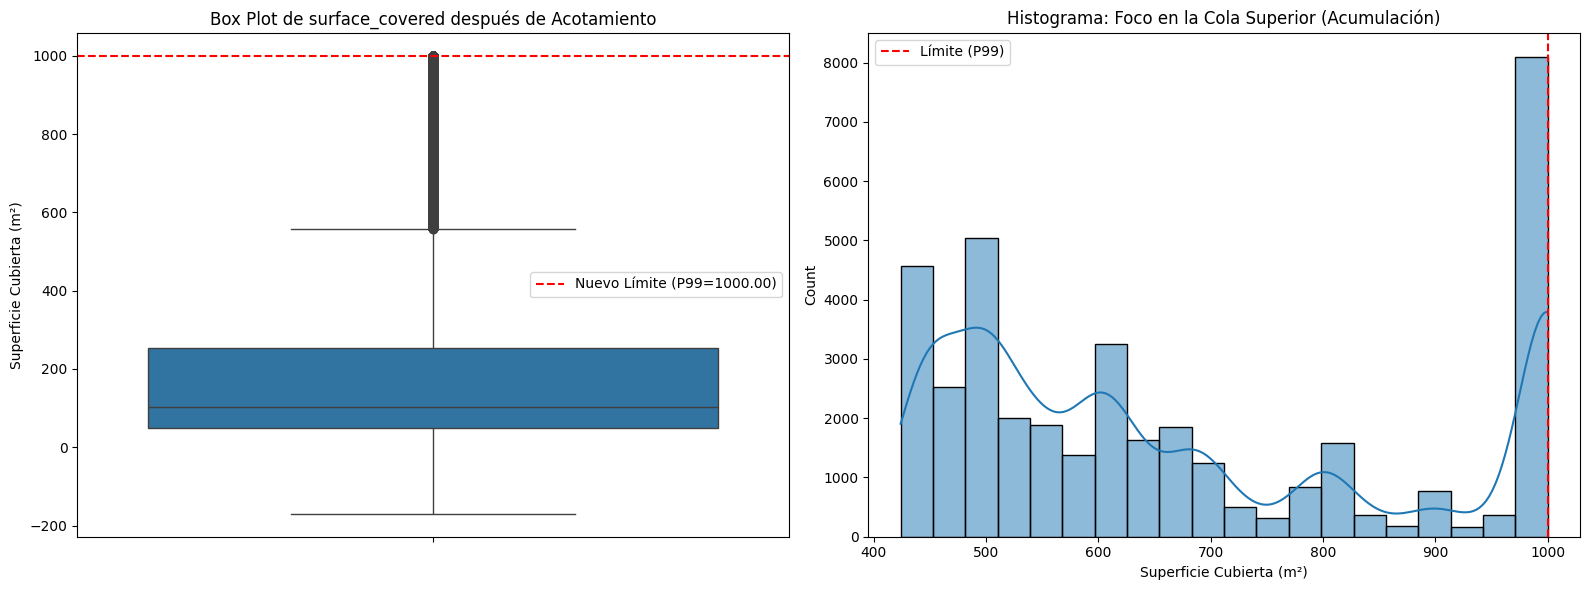

In [ ]:
# Bloque 59: Verificación de Acotamiento (Winsorizing)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Columna crítica que fue acotada
col_to_check = 'surface_covered'

# Calculamos el umbral (p99) antes del acotamiento para referencia en el Box Plot
# Nota: Si el Bloque 58 se ejecutó correctamente, p99 es ahora el valor máximo.
p99_value = df[col_to_check].max()

plt.figure(figsize=(16, 6))

# --- Gráfico 1: Box Plot (Muestra el acotamiento) ---
plt.subplot(1, 2, 1)
# Usamos un Box Plot para visualizar el nuevo límite superior del 99% de los datos
sns.boxplot(y=df[col_to_check])
plt.title(f'Box Plot de {col_to_check} después de Acotamiento')
plt.ylabel('Superficie Cubierta (m²)')
# Dibujamos una línea en el nuevo valor máximo (el p99) para referencia
plt.axhline(p99_value, color='red', linestyle='--', label=f'Nuevo Límite (P99={p99_value:.2f})')
plt.legend()


# --- Gráfico 2: Histograma del Rango Superior (Muestra la acumulación de datos) ---
plt.subplot(1, 2, 2)
# Limitamos el Histograma al rango donde ocurrió el acotamiento para ver el efecto
# Mostramos solo los valores entre el P95 y el P99 para ver la cola
lower_bound = df[col_to_check].quantile(0.95)
sns.histplot(df[df[col_to_check] >= lower_bound][col_to_check], bins=20, kde=True)
plt.title(f'Histograma: Foco en la Cola Superior (Acumulación)')
plt.xlabel('Superficie Cubierta (m²)')
plt.axvline(p99_value, color='red', linestyle='--', label=f'Límite (P99)')
plt.legend()


plt.tight_layout()
plt.show()

# Conclusión Esperada: En el Box Plot, el bigote superior debe terminar en o muy cerca de la línea roja.
# En el Histograma, los datos deben acumularse abruptamente cerca del valor p99.

In [ ]:
"""# Bloque 61 (Corrección de Nombres y Exportación Final)

# 1. Renombrar las claves recuperadas (Solución al KeyError)
# Renombramos 'id' y el tipo de operación con sufijo '_y' al nombre final deseado.
df_final_export.rename(columns={
    'original_id': 'id',
    'operation_type_y': 'operation_type'
}, inplace=True, errors='ignore')

# 2. Limpieza de columnas redundantes (la versión _x y remanentes)
# La versión _x o sin sufijo es redundante, ya que 'operation_type' (versión _y renombrada) es la correcta.
if 'operation_type_x' in df_final_export.columns:
    df_final_export.drop(columns=['operation_type_x'], inplace=True)
if 'operation_type' in df_final_export.columns and 'operation_type_y' in df_final_export.columns:
    # Caso de seguridad: si ambas existen, eliminamos la original si la y fue la correcta
    df_final_export.drop(columns=['operation_type'], inplace=True)


# 3. Definir las columnas finales para Power BI (con los nombres corregidos)
columnas_finales = [
    'id',                       # 🔑 Clave Primaria/FK
    'operation_type',           # Columna de tipo de venta
    'log_price_usd_final',      # Variable objetivo AVM
    'price_usd_final',          # Precio estandarizado en USD
    'l2', 'l3', 'lat', 'lon', 'property_type',
    'surface_covered', 'rooms', 'bathrooms',
    'dist_min_parque_km', 'dist_min_comercio_km'
]

# 4. Seleccionar y exportar a CSV
export_path = '/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/datasets/propiedades_limpias_final.csv'
df_export_bi = df_final_export[columnas_finales].copy()
df_export_bi.to_csv(export_path, index=False)

print("\n✅ ¡Exportación completada con éxito!")
print("Se resolvieron los conflictos de nombres y el archivo CSV está listo para Power BI.")"""

NameError: name 'df_final_export' is not defined